In [42]:
from IPython.display import display, HTML

display(HTML("<h1 style='color:blue' align='center'>Part B – Exploratory Data Analysis (EDA)</h1>"))

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
display(HTML("<h2 style='color:green' align='center'>===== Step 1: Dataset Overview ===== (EDA)</h2>"))

===== Step 1: Dataset Overview =====
Dataset shape (Rows, Columns): (541909, 8)

Column names: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

First 10 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879     

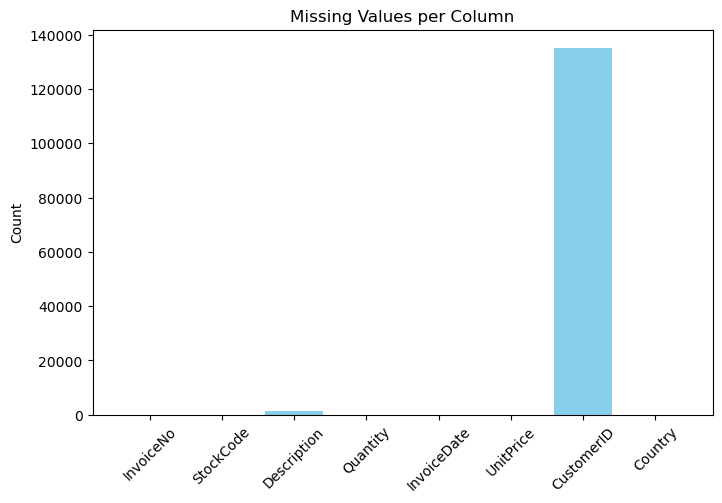

In [45]:
df=pd.read_csv("online_retail.csv")

print("===== Step 1: Dataset Overview =====")
print("Dataset shape (Rows, Columns):", df.shape)
print("\nColumn names:", df.columns)
print("\nFirst 10 rows:")
print(df.head(10))
print("\n")
# Shape of dataset
print(f"Number of Rows and Columns: {df.shape}\n")

# Column names
print("Columns in the dataset:")
print(df.columns, "\n")

# Basic info about dataset
print("Dataset Info:")
print(df.info(), "\n")

# Missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
print("Missing Values per Column:\n", missing_count, "\n")
print("Missing Values Percentage:\n", missing_percent, "\n")

# Summary statistics of numerical columns
print("Summary Statistics (Numerical Columns):")
print(df.describe(), "\n")

# Number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count, "\n")

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
print("InvoiceDate converted to datetime.\n")

# Unique counts
print("Number of Unique Countries:", df['Country'].nunique())
print("Number of Unique Invoices:", df['InvoiceNo'].nunique())
print("Number of Unique Products:", df['StockCode'].nunique())
print("Number of Unique Customers:", df['CustomerID'].nunique(), "\n")

# Visualize missing values
plt.figure(figsize=(8,5))
plt.bar(missing_count.index, missing_count.values, color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [46]:
display(HTML("<h2 style='color:green' align='center'>===== Step 2: Quantity & UnitPrice Analysis =====(EDA)</h2>"))

===== Step 2: Quantity & UnitPrice Analysis =====

Quantity Statistics: {'Mean': 9.55224954743324, 'Median': 3.0, 'Mode': 1, 'Std': 218.08115784986612, 'Min': -80995, 'Max': 80995, 'Skew': -0.2640763070668848} 

Number of transactions with negative Quantity (returns): 10624 

UnitPrice Statistics: {'Mean': 4.611113626088513, 'Median': 2.08, 'Mode': 1.25, 'Std': 96.75985306119716, 'Min': -11062.06, 'Max': 38970.0, 'Skew': 186.50697172054137} 

Quantity Quartiles:
 0.25     1.0
0.50     3.0
0.75    10.0
Name: Quantity, dtype: float64 

UnitPrice Quartiles:
 0.25    1.25
0.50    2.08
0.75    4.13
Name: UnitPrice, dtype: float64 

Quartiles of Quantity:
 0.25     1.0
0.50     3.0
0.75    10.0
Name: Quantity, dtype: float64

Quartiles of UnitPrice:
 0.25    1.25
0.50    2.08
0.75    4.13
Name: UnitPrice, dtype: float64


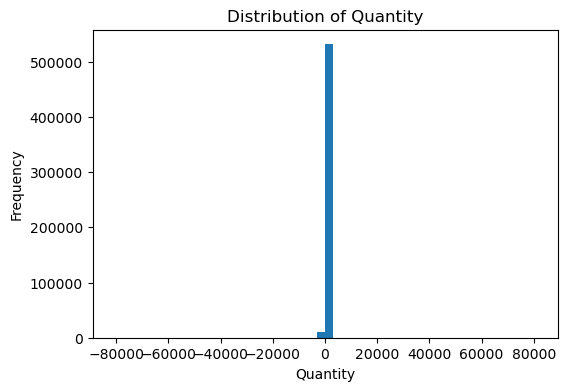

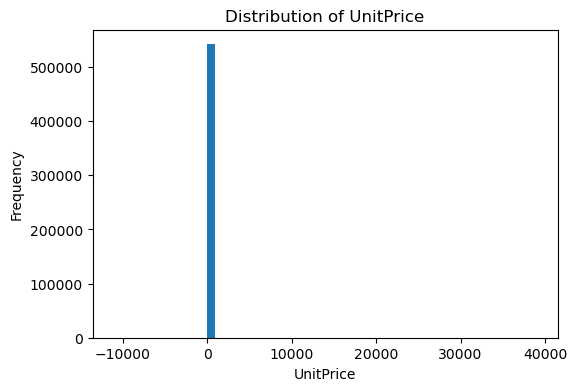

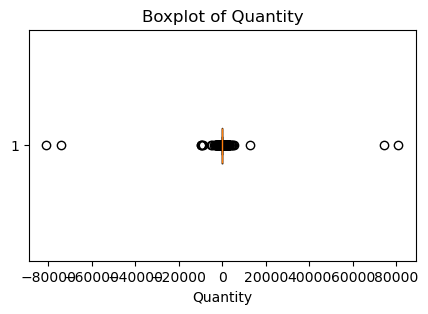

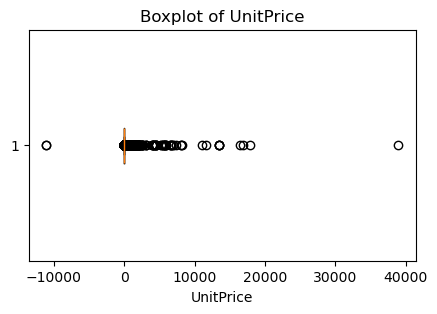

In [28]:
print("===== Step 2: Quantity & UnitPrice Analysis =====\n")

# Quantity analysis
quantity_stats = {
    "Mean": df["Quantity"].mean(),
    "Median": df["Quantity"].median(),
    "Mode": df["Quantity"].mode()[0],
    "Std": df["Quantity"].std(),
    "Min": df["Quantity"].min(),
    "Max": df["Quantity"].max(),
    "Skew": df["Quantity"].skew()
}
print("Quantity Statistics:", quantity_stats, "\n")

# Count negative quantities (returns)
negative_quantity_count = (df["Quantity"] < 0).sum()
print("Number of transactions with negative Quantity (returns):", negative_quantity_count, "\n")

# UnitPrice analysis
unitprice_stats = {
    "Mean": df["UnitPrice"].mean(),
    "Median": df["UnitPrice"].median(),
    "Mode": df["UnitPrice"].mode()[0],
    "Std": df["UnitPrice"].std(),
    "Min": df["UnitPrice"].min(),
    "Max": df["UnitPrice"].max(),
    "Skew": df["UnitPrice"].skew()
}
print("UnitPrice Statistics:", unitprice_stats, "\n")

# Quartiles
print("Quantity Quartiles:\n", df["Quantity"].quantile([0.25,0.50,0.75]), "\n")
print("UnitPrice Quartiles:\n", df["UnitPrice"].quantile([0.25,0.50,0.75]), "\n")
##observations:
# 1.Negative values in Quantity were observed, which likely represent product returns or cancelled transactions.
#2.The UnitPrice distribution is positively skewed, indicating that most products are sold at lower prices,while a small number of premium products have significantly higher prices.


# Quartiles
print("Quartiles of Quantity:\n", df["Quantity"].quantile([0.25, 0.50, 0.75]))
print("\nQuartiles of UnitPrice:\n", df["UnitPrice"].quantile([0.25, 0.50, 0.75]))
# Quartile analysis shows that the majority of transactions fall within a narrow range,
# while extreme values in the upper range indicate outliers and bulk or premium transactions.

# Quantity Histogram
plt.figure(figsize=(6,4))
plt.hist(df["Quantity"], bins=50)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# UnitPrice Histogram
plt.figure(figsize=(6,4))
plt.hist(df["UnitPrice"], bins=50)
plt.title("Distribution of UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.show()

# Quantity Boxplot
plt.figure(figsize=(5,3))
plt.boxplot(df["Quantity"], vert=False)
plt.title("Boxplot of Quantity")
plt.xlabel("Quantity")
plt.show()

# UnitPrice Boxplot
plt.figure(figsize=(5,3))
plt.boxplot(df["UnitPrice"], vert=False)
plt.title("Boxplot of UnitPrice")
plt.xlabel("UnitPrice")
plt.show()



In [48]:
display(HTML("<h2 style='color:green' align='center'>===== Step 3: Revenue & Top Products=====(EDA)</h2>"))

===== Step 3: Revenue & Top Products =====

Top 10 Products by Quantity:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64 



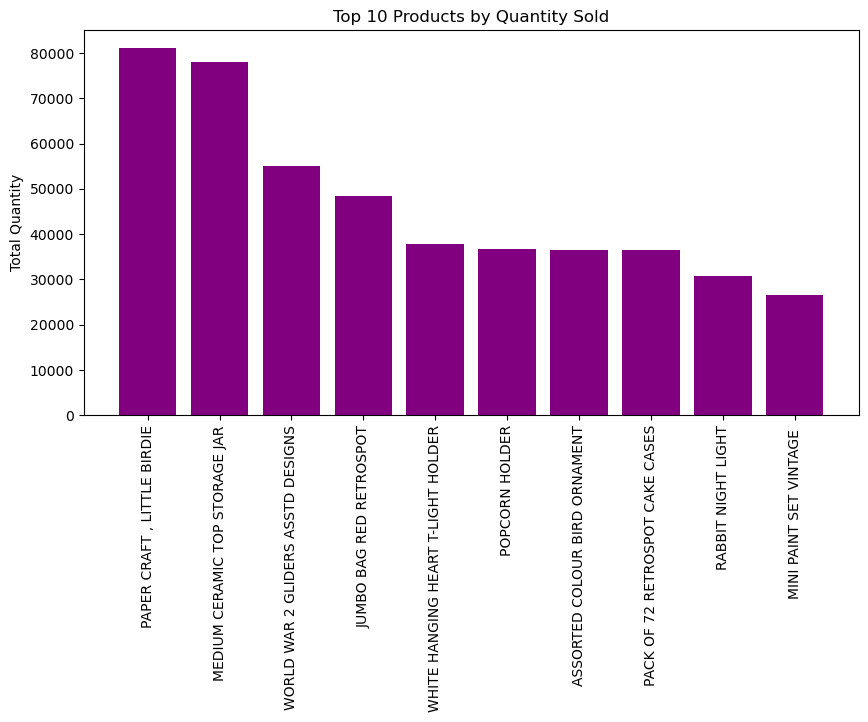

Top 10 Products by Revenue:
 Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64 



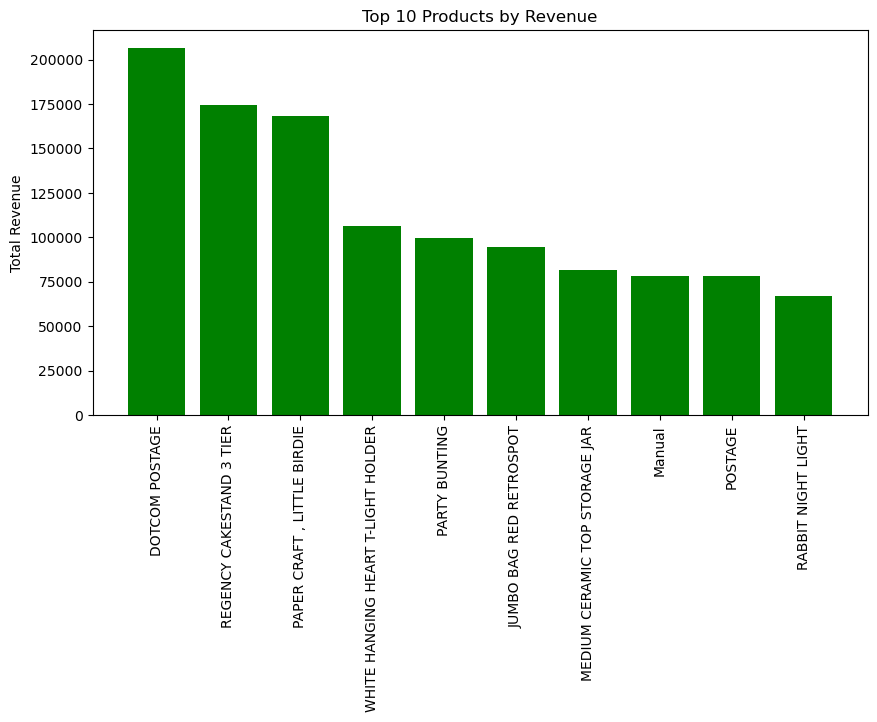

Top 10 Most Returned Products:
 Description
Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
check                                120
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
ROSES REGENCY TEACUP AND SAUCER       54
Name: Quantity, dtype: int64 



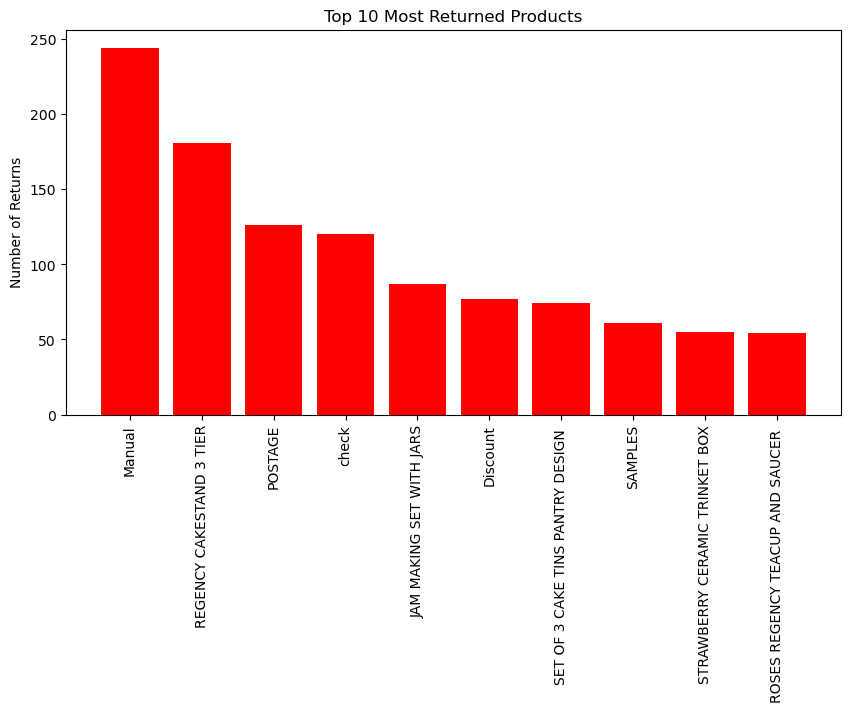


Top 10 Most Returned Products:

Description
Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
check                                120
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
ROSES REGENCY TEACUP AND SAUCER       54
Name: Quantity, dtype: int64


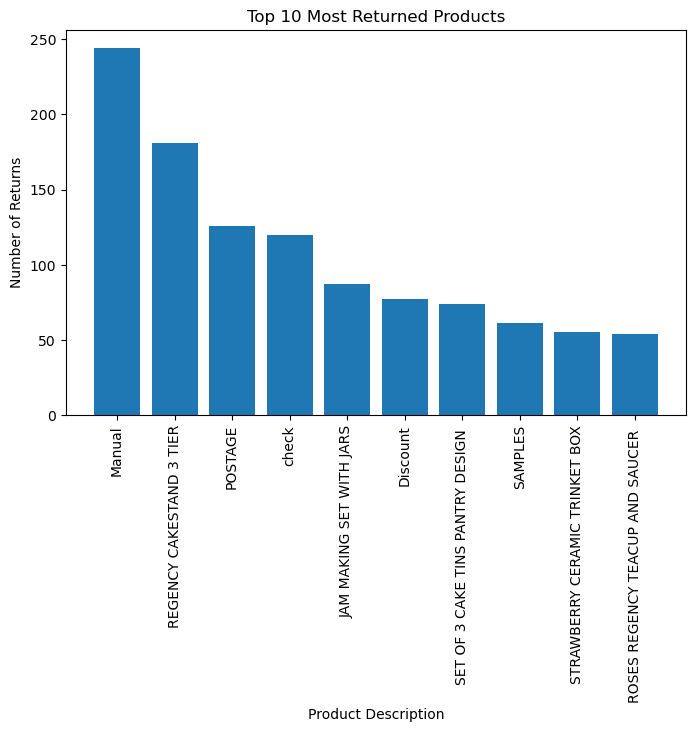

In [29]:
# =========================
# Step 3: Revenue & Top Products
# =========================

print("===== Step 3: Revenue & Top Products =====\n")

# Create Revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# Top 10 products by Quantity
top_quantity_products = df[df["Quantity"] > 0].groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity:\n", top_quantity_products, "\n")

plt.figure(figsize=(10,5))
plt.bar(top_quantity_products.index, top_quantity_products.values, color='purple')
plt.title("Top 10 Products by Quantity Sold")
plt.xticks(rotation=90)
plt.ylabel("Total Quantity")
plt.show()

# Top 10 products by Revenue
top_revenue_products = df[df["Revenue"] > 0].groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:\n", top_revenue_products, "\n")

plt.figure(figsize=(10,5))
plt.bar(top_revenue_products.index, top_revenue_products.values, color='green')
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=90)
plt.ylabel("Total Revenue")
plt.show()

# Most frequently returned products
returned_products = df[df["Quantity"] < 0].groupby("Description")["Quantity"].count().sort_values(ascending=False).head(10)
print("Top 10 Most Returned Products:\n", returned_products, "\n")

plt.figure(figsize=(10,5))
plt.bar(returned_products.index, returned_products.values, color='red')
plt.title("Top 10 Most Returned Products")
plt.xticks(rotation=90)
plt.ylabel("Number of Returns")
plt.show()

# =========================
# 4. Most Frequently Returned Products
# =========================
returned_products = (
    df[df["Quantity"] < 0]
    .groupby("Description")["Quantity"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Most Returned Products:\n")
print(returned_products)

plt.figure(figsize=(8,5))
plt.bar(returned_products.index, returned_products.values)
plt.title("Top 10 Most Returned Products")
plt.xlabel("Product Description")
plt.ylabel("Number of Returns")
plt.xticks(rotation=90)
plt.show()


# Observations:
# 1. A small number of products dominate total quantity sold, indicating high-demand items.
# 2. Revenue analysis shows that some high-priced products generate significant revenue despite lower sales volume.
# 3. Certain products appear frequently in return transactions, which may indicate quality issues or customer dissatisfaction.

In [49]:
display(HTML("<h2 style='color:green' align='center'>===== Step 4: Customer & Country Analysis=====(EDA)</h2>"))

===== Step 4: Customer & Country Analysis =====

Top 10 Customers by Revenue:
 CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64 



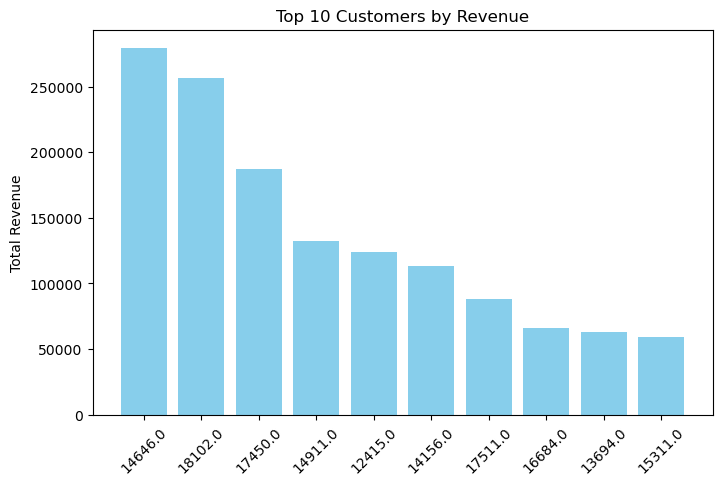

Top 10 Customers by Quantity Purchased:
 CustomerID
14646.0    196719
12415.0     77242
14911.0     77180
17450.0     69029
18102.0     64122
17511.0     63012
13694.0     61803
14298.0     58021
14156.0     57025
16684.0     49390
Name: Quantity, dtype: int64 



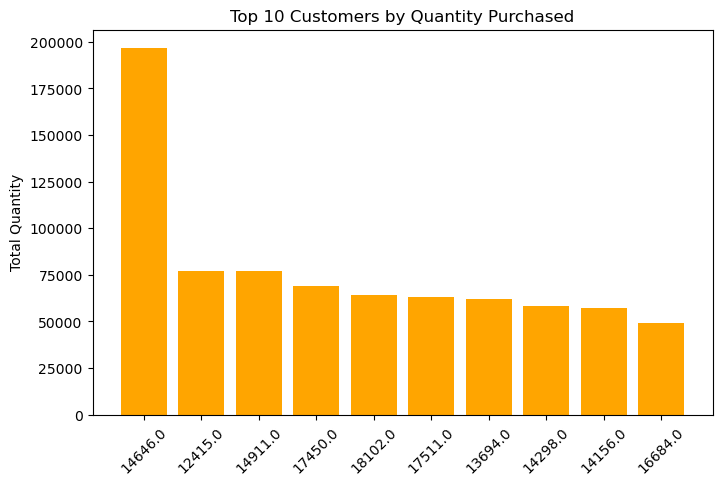

Top 10 Countries by Revenue:
 Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64 



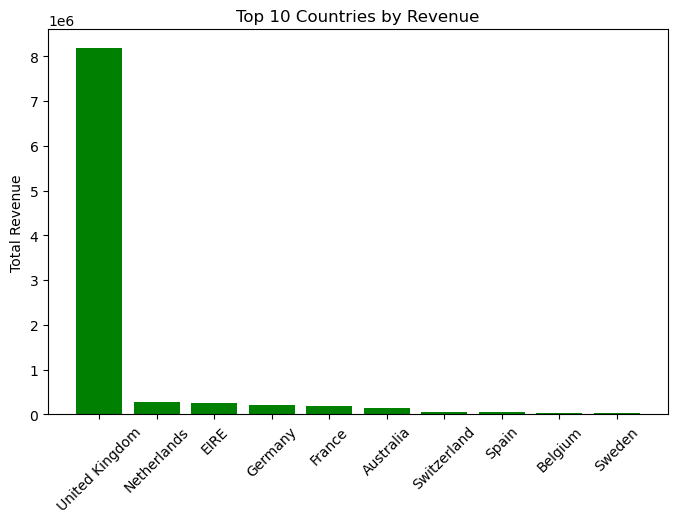

Top 10 Countries by Quantity Purchased:
 Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64 



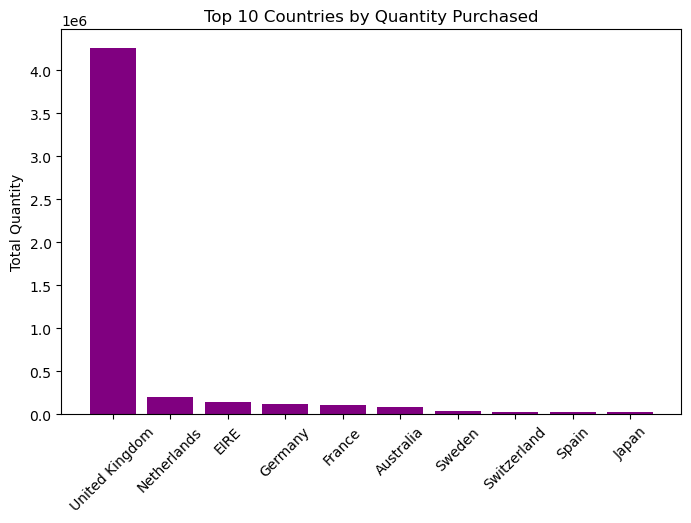

C:\Users\Shalu\AppData\Local\Temp\ipykernel_15084\880490954.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  avg_revenue_per_customer = df.groupby("Country").apply(lambda x: x["Revenue"].sum() / x["CustomerID"].nunique()).sort_values(ascending=False).head(10)
C:\Users\Shalu\AppData\Local\Temp\ipykernel_15084\880490954.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_revenue_per_customer = df.groupby("Country").apply(lambda x: x["Revenue"].sum() / x["CustomerID"].nunique()).sort_values(ascending=False).head(10)


Top 10 Countries by Average Revenue per Customer:
 Country
Hong Kong               inf
EIRE           8.775894e+04
Netherlands    3.162906e+04
Australia      1.523081e+04
Singapore      9.120390e+03
Sweden         4.574489e+03
Japan          4.417577e+03
Iceland        4.310000e+03
Norway         3.516346e+03
Switzerland    2.685017e+03
dtype: float64 



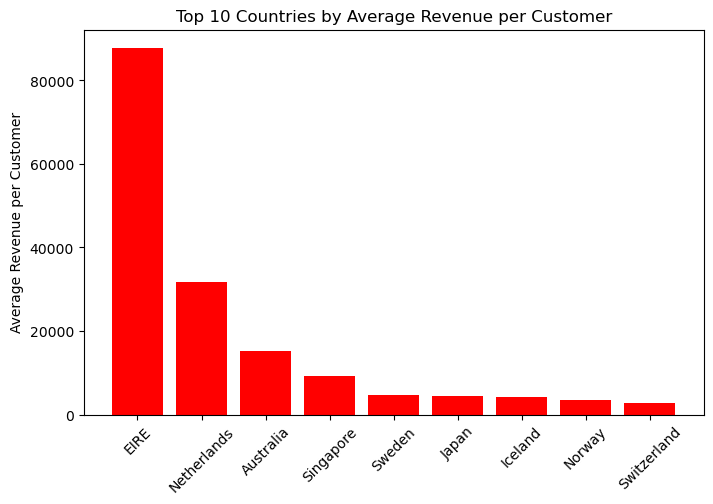

In [30]:
# =========================
# Step 4: Customer & Country Analysis
# =========================

print("===== Step 4: Customer & Country Analysis =====\n")

# Top 10 customers by Revenue
top_customers_revenue = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top_customers_revenue, "\n")

plt.figure(figsize=(8,5))
plt.bar(top_customers_revenue.index.astype(str), top_customers_revenue.values, color='skyblue')
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.show()

# Top 10 customers by Quantity
top_customers_quantity = df.groupby("CustomerID")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Quantity Purchased:\n", top_customers_quantity, "\n")

plt.figure(figsize=(8,5))
plt.bar(top_customers_quantity.index.astype(str), top_customers_quantity.values, color='orange')
plt.title("Top 10 Customers by Quantity Purchased")
plt.xticks(rotation=45)
plt.ylabel("Total Quantity")
plt.show()

# Top 10 countries by Revenue
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Revenue:\n", country_revenue, "\n")

plt.figure(figsize=(8,5))
plt.bar(country_revenue.index, country_revenue.values, color='green')
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.show()

# Top 10 countries by Quantity
country_quantity = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Quantity Purchased:\n", country_quantity, "\n")

plt.figure(figsize=(8,5))
plt.bar(country_quantity.index, country_quantity.values, color='purple')
plt.title("Top 10 Countries by Quantity Purchased")
plt.xticks(rotation=45)
plt.ylabel("Total Quantity")
plt.show()

# Average revenue per customer by Country
avg_revenue_per_customer = df.groupby("Country").apply(lambda x: x["Revenue"].sum() / x["CustomerID"].nunique()).sort_values(ascending=False).head(10)
print("Top 10 Countries by Average Revenue per Customer:\n", avg_revenue_per_customer, "\n")

plt.figure(figsize=(8,5))
plt.bar(avg_revenue_per_customer.index, avg_revenue_per_customer.values, color='red')
plt.title("Top 10 Countries by Average Revenue per Customer")
plt.xticks(rotation=45)
plt.ylabel("Average Revenue per Customer")
plt.show()

# Observations:
# 1. A small number of customers contribute disproportionately to total revenue,suggesting the presence of high-value clients.
# 2. A few countries dominate the overall transactions, indicating regional concentration of sales.
# 3. Average revenue per customer highlights the most profitable markets,which can guide targeted marketing or business strategies.

In [31]:
display(HTML("<h2 style='color:green' align='center'>===== Step 5: Data Quality & Anomalies =====(EDA)</h2>"))

===== Step 5: Data Quality & Anomalies =====

Missing Values per Column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135066
Country             0
dtype: int64 

Percentage of Missing Values:
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.924111
Country         0.000000
dtype: float64 

Number of Duplicate Rows: 5268 

Transactions with Negative Quantity: 10624
Transactions with Zero or Negative UnitPrice: 2517
Quantity above 99th percentile: 4950
UnitPrice above 99th percentile: 4790 



In [31]:
# =========================
# Step 5: Data Quality & Missing Values
# =========================

print("===== Step 5: Data Quality & Anomalies =====\n")

# Missing values
print("Missing Values per Column:\n", missing_count, "\n")
print("Percentage of Missing Values:\n", missing_percent, "\n")

# Duplicate rows
print("Number of Duplicate Rows:", duplicate_count, "\n")

# Anomalies
negative_quantity_count = (df["Quantity"] < 0).sum()
invalid_unitprice_count = (df["UnitPrice"] <= 0).sum()
print("Transactions with Negative Quantity:", negative_quantity_count)
print("Transactions with Zero or Negative UnitPrice:", invalid_unitprice_count)

# Extreme values (99th percentile)
large_quantity_threshold = df["Quantity"].quantile(0.99)
large_unitprice_threshold = df["UnitPrice"].quantile(0.99)
print("Quantity above 99th percentile:", df[df["Quantity"] > large_quantity_threshold]["Quantity"].count())
print("UnitPrice above 99th percentile:", df[df["UnitPrice"] > large_unitprice_threshold]["UnitPrice"].count(), "\n")

# Observations:
# 1. CustomerID has missing values which may limit customer-level analysis for those transactions.
# 2. Description column has some missing entries; this may affect product-level insights.
# 3. Negative Quantity values represent returns or cancellations, as noted previously.
# 4. Some extreme values in Quantity and UnitPrice are present, likely representing bulk orders or premium products.
# 5. Duplicate rows exist in the dataset and may need to be removed before further analysis.
# 6. Overall, the dataset is mostly clean, with a few quality gaps to be handled carefully.

===== Step 5: Data Quality & Anomalies =====

Missing Values per Column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135066
Country             0
dtype: int64 

Percentage of Missing Values:
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.924111
Country         0.000000
dtype: float64 

Number of Duplicate Rows: 5268 

Transactions with Negative Quantity: 10624
Transactions with Zero or Negative UnitPrice: 2517
Quantity above 99th percentile: 4950
UnitPrice above 99th percentile: 4790 



In [50]:
display(HTML("<h2 style='color:green' align='center'>===== Step 6: EDA Summary & Key Insights =====(EDA)</h2>"))

In [32]:
# =========================
# Step 6: EDA Summary & Key Insights
# =========================

print("===== Step 6: EDA Summary & Key Insights =====\n")

# Key observations
print("1. Most transactions have small quantities; few large orders or returns cause skewness in Quantity.")
print("2. UnitPrice is positively skewed; most products are low-priced, few premium items.")
print("3. CustomerID has some missing values; Description has minor missing data.")
print("4. A small set of products contributes most of the total quantity sold and revenue.")
print("5. A small number of customers contribute disproportionately to total revenue.")
print("6. Country-level analysis shows few countries dominate sales, indicating regional concentration.")
print("7. Negative Quantity values represent returns or cancellations.")
print("8. Outliers in Quantity and UnitPrice exist, indicating bulk purchases or premium products.\n")

===== Step 6: EDA Summary & Key Insights =====

1. Most transactions have small quantities; few large orders or returns cause skewness in Quantity.
2. UnitPrice is positively skewed; most products are low-priced, few premium items.
3. CustomerID has some missing values; Description has minor missing data.
4. A small set of products contributes most of the total quantity sold and revenue.
5. A small number of customers contribute disproportionately to total revenue.
6. Country-level analysis shows few countries dominate sales, indicating regional concentration.
7. Negative Quantity values represent returns or cancellations.
8. Outliers in Quantity and UnitPrice exist, indicating bulk purchases or premium products.



In [51]:
display(HTML("<h2 style='color:green' align='center'>===== Step 7: Recommendations =====(EDA)</h2>"))

In [52]:
# =========================
# Step 7: Advanced Insights & Recommendations
# =========================

print("===== Step 7: Recommendations =====\n")
print("Key Recommendations:")
print("1. Focus marketing and inventory on top-selling and high-revenue products.")
print("2. Implement loyalty programs for top customers contributing most revenue.")
print("3. Expand operations or marketing in top countries driving majority of revenue.")
print("4. Monitor returns (negative Quantity) to improve customer satisfaction.")
print("5. Analyze bulk purchases and premium products separately for pricing strategy.")


===== Step 7: Recommendations =====

Key Recommendations:
1. Focus marketing and inventory on top-selling and high-revenue products.
2. Implement loyalty programs for top customers contributing most revenue.
3. Expand operations or marketing in top countries driving majority of revenue.
4. Monitor returns (negative Quantity) to improve customer satisfaction.
5. Analyze bulk purchases and premium products separately for pricing strategy.
